In [ ]:
from IPython.display import HTML

url = "https://nlptextanalyzerbyluvgoel.page.gd/"

HTML(f"""
<style>@keyframes g{{0%,100%{{background-position:0 50%}}50%{{background-position:100% 50%}}}}</style>
<div style="text-align:center;padding:10px;background:linear-gradient(135deg,#667eea,#764ba2,#667eea);background-size:200%;animation:g 4s ease infinite;border-radius:10px">
<br><h2 style="color:#fff;margin:0 0 5px">🤖 NLP Tools by Luv Goel</h2><br>
<a href="{url}" target="_blank" style="display:inline-block;padding:15px 40px;background:#fff;color:#667eea;font-weight:bold;font-size:16px;border-radius:10px;box-shadow:0 5px 15px rgba(0,0,0,.3);text-decoration:none;transition:transform .3s" onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">Click Here to Open Website</a>
</div>
""")

In [ ]:
pip install PyPDF2

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import spacy
import PyPDF2

# Download required data (run once)
nltk.download('punkt_tab', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
nltk.download('vader_lexicon', quiet=True)

# Load spaCy
nlp = spacy.load('en_core_web_sm')

In [ ]:
f = open('Apple Inc.pdf','rb')

# Sample text to analyze
text = PyPDF2.PdfReader(f)

##1. PART-OF-SPEECH TAGGING

In [ ]:
print("PART-OF-SPEECH TAGGING")
print("-"*30)

# We need to extract the actual text content from it to perform tokenization.
extracted_text = ""
for page_num in range(len(text.pages)): # 'text' here refers to the PyPDF2.PdfReader object
    page = text.pages[page_num]
    extracted_text += page.extract_text() + "\n"

tokens = word_tokenize(extracted_text) # Use the extracted string for tokenization
pos_tags = pos_tag(tokens)

for word, tag in pos_tags[:]:
    print(f"{word:20} -> {tag}")

PART-OF-SPEECH TAGGING
------------------------------
Apple                -> NNP
Inc.                 -> NNP
Apple                -> NNP
Inc.                 -> NNP
is                   -> VBZ
a                    -> DT
multinational        -> JJ
technology           -> NN
company              -> NN
headquartered        -> VBD
in                   -> IN
Cupertino            -> NNP
,                    -> ,
California           -> NNP
,                    -> ,
United               -> NNP
States               -> NNPS
.                    -> .
It                   -> PRP
is                   -> VBZ
one                  -> CD
of                   -> IN
the                  -> DT
world                -> NN
’                    -> NNP
s                    -> VBZ
most                 -> RBS
valuable             -> JJ
and                  -> CC
influential          -> JJ
companies            -> NNS
,                    -> ,
widely               -> RB
recognized           -> VBN
for           

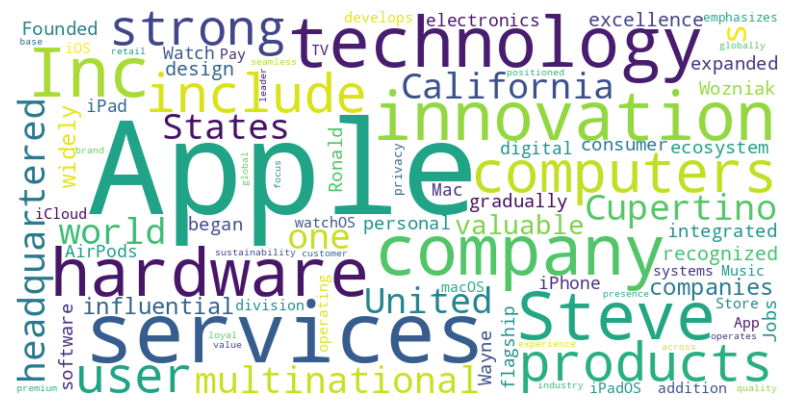

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(extracted_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

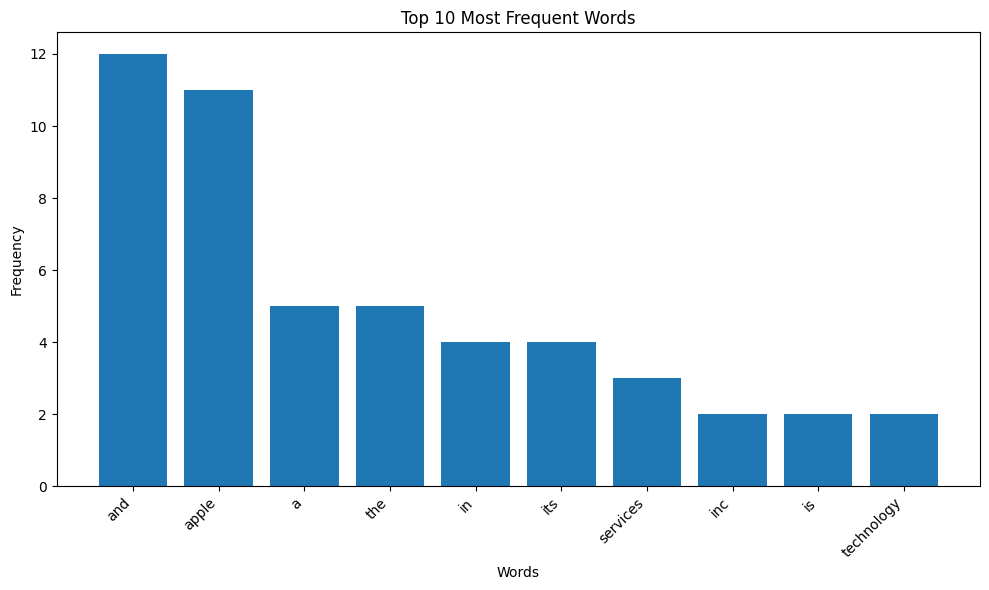

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import re

words = re.findall(r'\b\w+\b', extracted_text.lower()) # Tokenize and lowercase
word_counts = Counter(words)
most_common_words = word_counts.most_common(10) # Get top 10

words_to_plot = [word for word, count in most_common_words]
counts_to_plot = [count for word, count in most_common_words]

plt.figure(figsize=(10, 6))
plt.bar(words_to_plot, counts_to_plot)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from spacy import displacy
doc = nlp(extracted_text)
displacy.render(doc, style="dep", jupyter=True)

##2. NAMED ENTITY RECOGNITION

In [ ]:
print("NAMED ENTITY RECOGNITION")
print("-"*40)

doc = nlp(extracted_text)

for entity in doc.ents:
    print(f"{entity.text:25} -> {entity.label_:15}")

NAMED ENTITY RECOGNITION
----------------------------------------
Apple Inc.                -> ORG            
Apple Inc.                -> ORG            
Cupertino                 -> GPE            
California                -> GPE            
United
States             -> GPE            
1976                      -> DATE           
Steve Jobs                -> PERSON         
Steve Wozniak             -> PERSON         
Ronald Wayne              -> PERSON         
Apple                     -> ORG            
iPhone                    -> ORG            
iPad                      -> ORG            
Mac                       -> ORG            
Apple Watch               -> ORG            
AirPods                   -> PRODUCT        
Apple                     -> ORG            
Apple                     -> ORG            
App Store                 -> PERSON         
Apple
Music               -> ORG            
Apple Pay                 -> ORG            
Apple                     -> ORG  

In [ ]:
for sent in doc.sents:
  displacy.render(sent, style='ent')

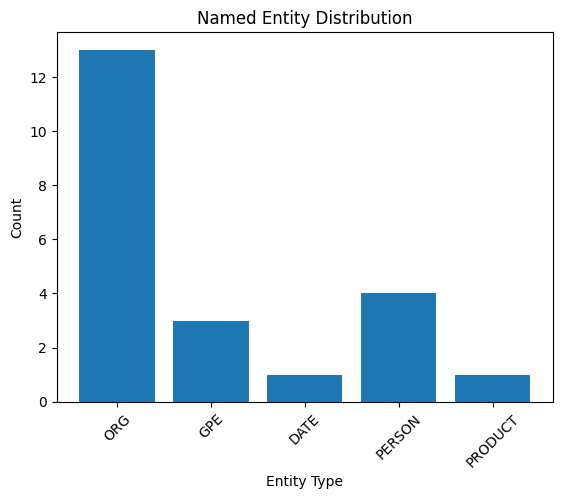

In [ ]:
# Named Entity Distribution
ent_counts = Counter([ent.label_ for ent in doc.ents])

plt.figure()
plt.bar(ent_counts.keys(), ent_counts.values())
plt.title("Named Entity Distribution")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##3. DEPENDENCY PARSING

In [ ]:
print("DEPENDENCY PARSING")
print("-"*45)
print(f"{'Word':15} {'Dependency':15} {'Head Word'}")
print("-"*45)

for token in doc[:]:
    print(f"{token.text:15} {token.dep_:15} {token.head.text}")

DEPENDENCY PARSING
---------------------------------------------
Word            Dependency      Head Word
---------------------------------------------
Apple           compound        Inc.
Inc.            compound        Inc.

               dep             Inc.
Apple           compound        Inc.
Inc.            nsubj           is
is              ROOT            is
a               det             company
multinational   amod            technology
technology      compound        company
company         attr            is
headquartered   acl             company
in              prep            headquartered
Cupertino       pobj            in
,               punct           Cupertino
California      conj            Cupertino
,               punct           California
United          compound        States

               dep             United
States          conj            California
.               punct           is
It              nsubj           is
is              ROOT            

##4. SENTIMENT ANALYSIS

In [ ]:
print("SENTIMENT ANALYSIS")
print("-"*35)

sia = SentimentIntensityAnalyzer()
sentiment_scores = sia.polarity_scores(extracted_text)

print(f"Positive: {sentiment_scores['pos']:.2f}")
print(f"Negative: {sentiment_scores['neg']:.2f}")
print(f"Neutral:  {sentiment_scores['neu']:.2f}")
print(f"Compound: {sentiment_scores['compound']:.2f}")

if sentiment_scores['compound'] >= 0.05:
    print("\n=> Overall Sentiment: POSITIVE 😊")
elif sentiment_scores['compound'] <= -0.05:
    print("\n=> Overall Sentiment: NEGATIVE 😞")
else:
    print("\n=> Overall Sentiment: NEUTRAL 😐")

SENTIMENT ANALYSIS
-----------------------------------
Positive: 0.18
Negative: 0.01
Neutral:  0.81
Compound: 0.98

=> Overall Sentiment: POSITIVE 😊


##5. TEXT CLASSIFICATION

In [ ]:
print("TEXT CLASSIFICATION")
print("-"*30)

# Define categories and keywords
categories = {
    'Technology': ['tech', 'software', 'ai', 'artificial intelligence', 'computer'],
    'Business': ['profit', 'company', 'stock', 'ceo', 'announced'],
    'Sports': ['game', 'player', 'team', 'match'],
    'Politics': ['government', 'president', 'election'],
}

# Count keyword matches
text_lower = extracted_text.lower()
category_scores = {}

for category, keywords in categories.items():
    score = 0
    for keyword in keywords:
        if keyword in text_lower:
            score += 1
    category_scores[category] = score

# Display results
for category, score in sorted(category_scores.items(), key=lambda x: x[1], reverse=True):
    bar = '█' * score
    print(f"{category:15} {bar} ({score})")

best_category = max(category_scores, key=category_scores.get)
print(f"\n=> Top Category: {best_category}")

TEXT CLASSIFICATION
------------------------------
Technology      ████ (4)
Business        █ (1)
Sports           (0)
Politics         (0)

=> Top Category: Technology


##6. TOPIC MODELING (Keyword Extraction)

In [ ]:
print("TOPIC MODELING - TOP KEYWORDS")
print("-"*35)

# Extract important words (nouns and adjectives)
important_words = []
for token in doc:
    if token.pos_ in ['NOUN', 'PROPN', 'ADJ'] and len(token.text) > 2:
        important_words.append(token.text.lower())

# Count frequency
word_counts = Counter(important_words)

# Show top 10 keywords
print(f"{'Keyword':20} {'Frequency'}")
print("-"*35)
for word, count in word_counts.most_common(10):
    print(f"{word:20} {count}")

TOPIC MODELING - TOP KEYWORDS
-----------------------------------
Keyword              Frequency
-----------------------------------
apple                11
services             3
inc.                 2
technology           2
company              2
innovation           2
hardware             2
steve                2
computers            2
products             2


In [ ]:
# SUMMARY
print("="*25)
print("ANALYSIS COMPLETE!")
print("="*25)

print(f"\nTotal Words: {len(tokens)}")
print(f"Named Entities Found: {len(doc.ents)}")
print(f"Sentiment: {sentiment_scores['compound']:.2f}")
print(f"Main Category: {best_category}")
print(f"Top Keyword: {word_counts.most_common(1)[0][0] if word_counts else 'N/A'}")

ANALYSIS COMPLETE!

Total Words: 197
Named Entities Found: 22
Sentiment: 0.98
Main Category: Technology
Top Keyword: apple
